### Notebook by [Volkan Sonmez](http://www.pythonicfool.com/)  
### Breast Cancer Wisconsin Dataset Analysis with Decision Tree and XGBoost Algorithms
##### [Pythonicfool GitHub Repository](https://github.com/volkansonmez/Exploratory_Data_Analysis_and_ML_Projects)


## Table of contents

1. [Introduction](#Introduction)

3. [EDA and Building ML Model](#EDA_and_Building_ML_Model)

3. [Conclusion](#Conclusion)

## Introduction

[[ go back to the top ]](#Table-of-contents)

To detect if the cancer cells are benign or malignant, a decision tree is built from scratch and trained with the Wisconsin Cancer Dataset. XGBoost module from sklearn is imported to train and test this data for accuracy comparision. 

> The dataset can be obtained at: http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28diagnostic%29 
* Dataset has information about 569 patients (instances). There are 32 features (attributes) for each instance.

## EDA_and_Building_ML_Model

[[ go back to the top ]](#Table-of-contents)

This notebook uses several Python packages that come standard with the Anaconda Python distribution. 
The primary libraries you need to run this notebook are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn

Instructions for building a model: Load the dataset into pandas dataframe. Eliminate the dependent attributes by observing a heatmap. View the feature scores with chi2 test to prune the features that don't contribute much to the result (label). 

Build a decision tree from scratch. To stop the further split and label the nodes, an acceptable 0.05 Gini impurity value can be used as a default. Train the decision tree and then test its performance. Import XGBoost from sklearn and train this model as well. Compare XGBoost's and the decision tree's test performances. 

Display the test results in a confusion_matrix. 

In [2]:
# Import necessary libraries

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import train_test_split

# download the data into a pandas dataframe and view the head
data = pd.read_csv('data.csv')
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# View all the attribute names in the dataframe

col = data.columns  
print(col)
print(data.shape) # display the number of patients and number of attributes 

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')
(569, 33)


In [4]:
# Split the data and target values 

y = data.diagnosis # target values
x = data.drop(['diagnosis'], axis = 1) # rest of the data after diagnosis feature is dropped (removing lahels)

print(y.value_counts()) # Display the benign vs malignant value counts 
x.head()
print(y.iloc[15:20])
# df['column name'] = df['column name'].replace(['old value'],'new value')
y = y.replace(['B'],0) 
y = y.replace(['M'],1) 
print(y.iloc[15:20]) # view a part of the data and make sure that B and M strings are replaced by 0 and 1

B    357
M    212
Name: diagnosis, dtype: int64
15    M
16    M
17    M
18    M
19    B
Name: diagnosis, dtype: object
15    1
16    1
17    1
18    1
19    0
Name: diagnosis, dtype: int64


In [5]:
# Drop id and unnamed32 attributes as well from the dataset 

x = x.drop(['id','Unnamed: 32'], axis = 1)
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
x.describe() # view the min, max values, std, count, and mean for each attribute

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

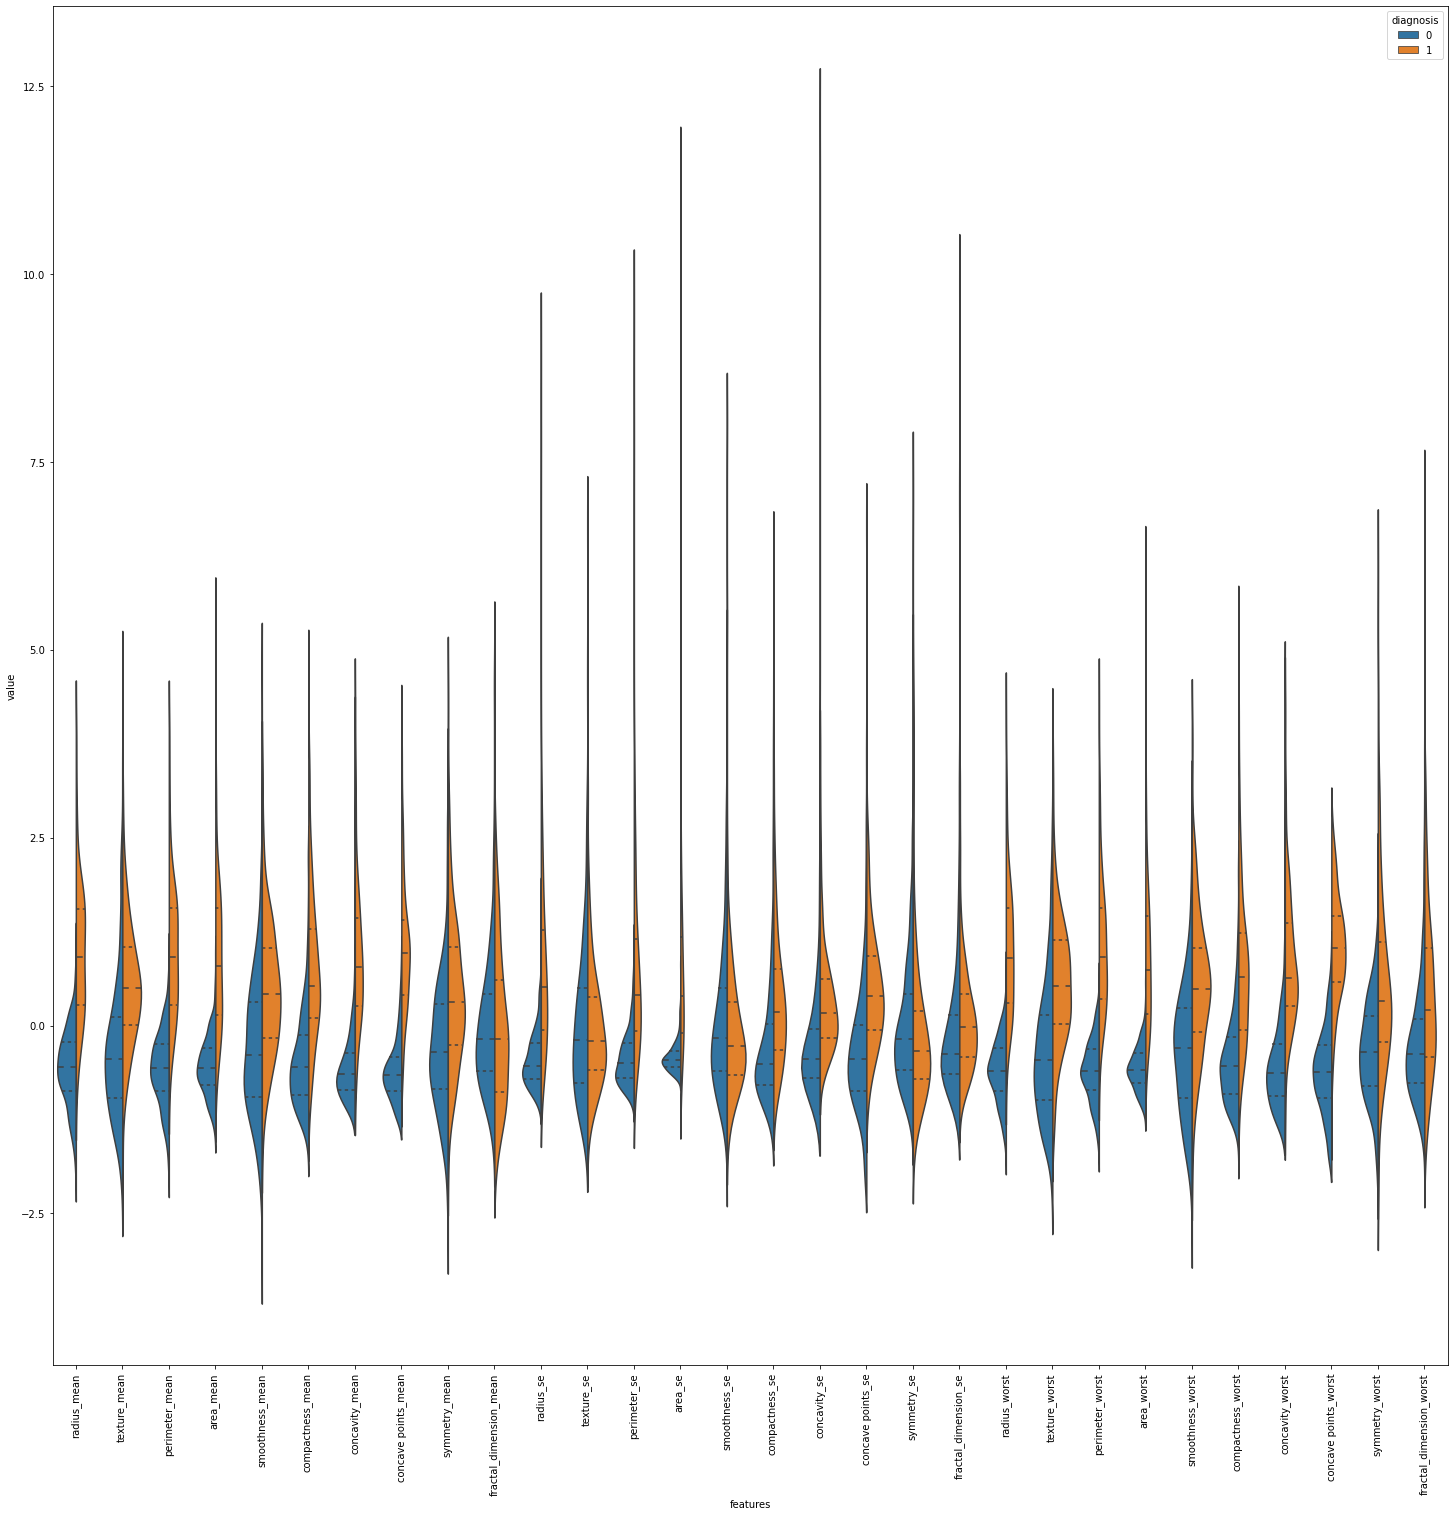

In [7]:
# Visualize the effect of each attribute on the label (0 or 1)

data_s = (x - x.mean()) / (x.std())  # standardize the data before the violin plot 
data = pd.concat([y, data_s], axis=1) # concat the results and data 
data = pd.melt(data, id_vars="diagnosis", var_name="features", value_name='value') # x data, y, x title, y title 
plt.figure(figsize=(25,25))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=90)

According to the violin plot, some attributes have a good separation to determine the outcome (label).

For example, The "radius-mean", the first attribute on the left, shows that its size (value) contributes to a good separation. The smaller the radius is, the bluer (benign) the cancer is. On the other hand, looking at the "symmetry_se" attribute, any value in this attribute has almost 50-50 chance contribution for the outcome. We can conclude that it is not a good attribute that contributes to the outcome (labeling cancer) so much.
    

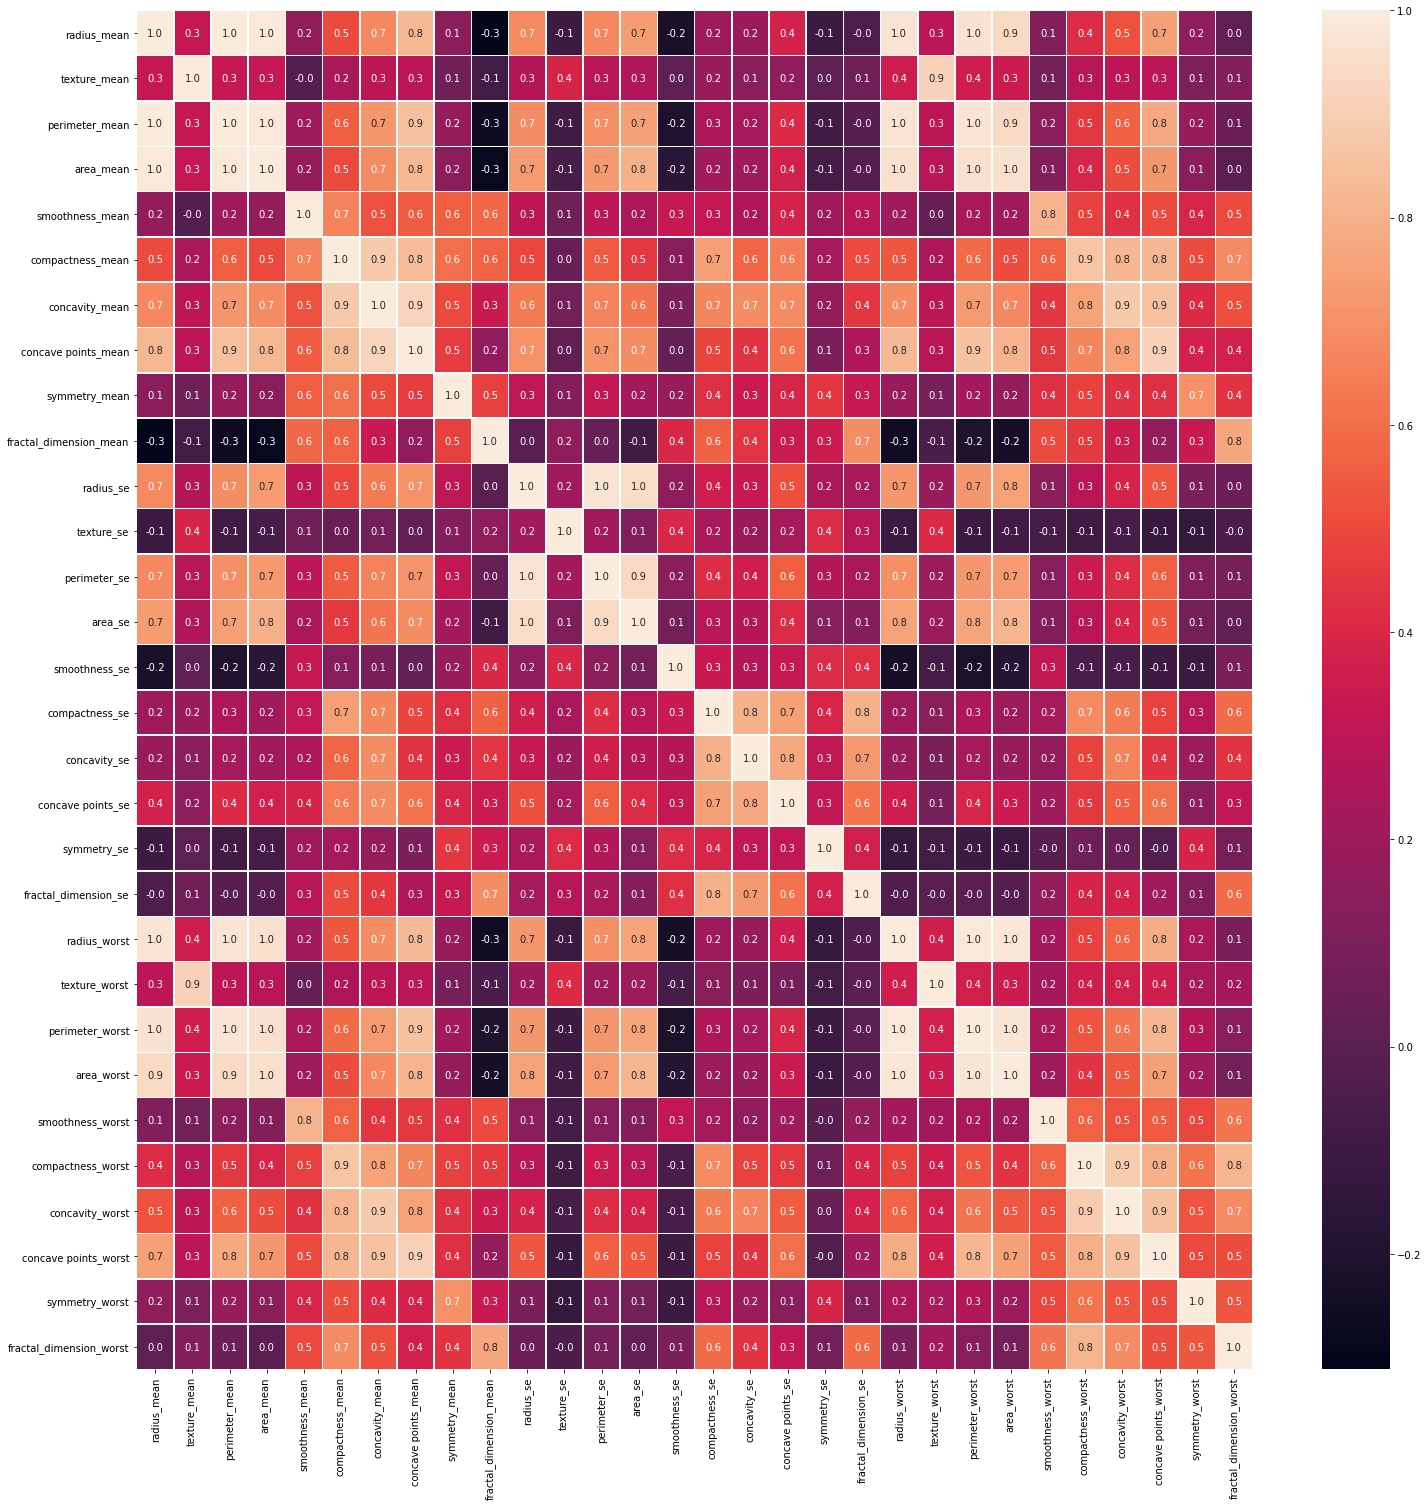

In [8]:
# Visualize the correlation of all features in a heatmap

fig , ax = plt.subplots(figsize=(25, 25))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f', ax=ax)

Some attributes are highly dependent on each other. We need to see the feature scores and drop some of them

In [9]:
# Import chi2 to see how each attribute contributes to the final score (0 or 1)

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# check the scores
bestfeatures = SelectKBest(score_func = chi2, k= "all")
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1, sort= False)
featureScores.columns = ['Specs','Score']  
print(featureScores)

                      Specs          Score
0               radius_mean     266.104917
1              texture_mean      93.897508
2            perimeter_mean    2011.102864
3                 area_mean   53991.655924
4           smoothness_mean       0.149899
5          compactness_mean       5.403075
6            concavity_mean      19.712354
7       concave points_mean      10.544035
8             symmetry_mean       0.257380
9    fractal_dimension_mean       0.000074
10                radius_se      34.675247
11               texture_se       0.009794
12             perimeter_se     250.571896
13                  area_se    8758.504705
14            smoothness_se       0.003266
15           compactness_se       0.613785
16             concavity_se       1.044718
17        concave points_se       0.305232
18              symmetry_se       0.000080
19     fractal_dimension_se       0.006371
20             radius_worst     491.689157
21            texture_worst     174.449400
22         

In [10]:
# Drop some of the features that are dependent on each other, or highly collarated with each other. Keep one of them.

# radius mean ~== perimeter mean, area mean, radius worst, perimeter worst. Keep the "AREA MEAN" and drop all others. 
# parimeter se ~== radius se. Keep the "PARIMETER SE"
# perimeter worst ~== area worst, radius worst. Drop perimeter worst and radius worst.  Keep the "AREA worst"

x = x.drop(['radius_mean', 'perimeter_mean', 'radius_worst','radius_se','perimeter_worst'], axis = 1)
print(x.shape)
x.describe()

(569, 25)


,texture_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,texture_se,perimeter_se,...,symmetry_se,fractal_dimension_se,texture_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,19.289649,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,1.216853,2.866059,...,0.020542,0.003795,25.677223,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,4.301036,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.551648,2.021855,...,0.008266,0.002646,6.146258,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,9.710000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.360200,0.757000,...,0.007882,0.000895,12.020000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,16.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.833900,1.606000,...,0.015160,0.002248,21.080000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,18.840000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,1.108000,2.287000,...,0.018730,0.003187,25.410000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,21.800000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,1.474000,3.357000,...,0.023480,0.004558,29.720000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,39.280000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,4.885000,21.980000,...,0.078950,0.029840,49.540000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [11]:
# Revisit the feature scores after dropping off some corralated attributes

bestfeatures = SelectKBest(score_func = chi2, k= "all")
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns, dfscores], axis=1, sort= True)
featureScores.columns = ['Specs','Score']  
print(featureScores.sort_values(by = 'Score', ascending = False )) # from best to worst attributes that effect the label
list_of_unwanted_att = featureScores.sort_values(by = 'Score', ascending = True).iloc[:15]['Specs']
# Decision: Continue with the best 10 features




                      Specs          Score
18               area_worst  112598.431564
1                 area_mean   53991.655924
10                  area_se    8758.504705
9              perimeter_se     250.571896
17            texture_worst     174.449400
0              texture_mean      93.897508
21          concavity_worst      39.516915
4            concavity_mean      19.712354
20        compactness_worst      19.314922
22     concave points_worst      13.485419
5       concave points_mean      10.544035
3          compactness_mean       5.403075
23           symmetry_worst       1.298861
13             concavity_se       1.044718
12           compactness_se       0.613785
19         smoothness_worst       0.397366
14        concave points_se       0.305232
6             symmetry_mean       0.257380
24  fractal_dimension_worst       0.231522
2           smoothness_mean       0.149899
8                texture_se       0.009794
16     fractal_dimension_se       0.006371
11         

In [12]:
# Drop off the attributes that have low scores. 

print(list_of_unwanted_att)
x = x.drop(list_of_unwanted_att, axis = 1)

7      fractal_dimension_mean
15                symmetry_se
11              smoothness_se
16       fractal_dimension_se
8                  texture_se
2             smoothness_mean
24    fractal_dimension_worst
6               symmetry_mean
14          concave points_se
19           smoothness_worst
12             compactness_se
13               concavity_se
23             symmetry_worst
3            compactness_mean
5         concave points_mean
Name: Specs, dtype: object


In [13]:
# View the trimmed, pruned, and cleaned data with most important attributes

print(x.shape)
print(x.iloc[0]) # view an instance

(569, 10)
texture_mean              10.3800
area_mean               1001.0000
concavity_mean             0.3001
perimeter_se               8.5890
area_se                  153.4000
texture_worst             17.3300
area_worst              2019.0000
compactness_worst          0.6656
concavity_worst            0.7119
concave points_worst       0.2654
Name: 0, dtype: float64


In [14]:
# Standardize the data so that each attribute gets equal importance

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# normalization
x_train = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test = (x_test-x_test.mean())/(x_test.max()-x_test.min())

print(x_train.iloc[0], x_test.iloc[0], y_train.iloc[0], y_test.iloc[0])


texture_mean           -0.062734
area_mean              -0.173293
concavity_mean          0.525075
perimeter_se           -0.045858
area_se                -0.041840
texture_worst          -0.076911
area_worst             -0.137030
compactness_worst       0.201797
concavity_worst         0.780675
concave points_worst    0.208996
Name: 68, dtype: float64 texture_mean           -0.054866
area_mean              -0.100911
concavity_mean         -0.022256
perimeter_se           -0.045153
area_se                -0.058234
texture_worst          -0.046210
area_worst             -0.066846
compactness_worst      -0.022476
concavity_worst         0.004086
concave points_worst   -0.051617
Name: 204, dtype: float64 0 0


In [15]:
# Write a simple decision tree algorithm from scratch and train this dataset:

import numpy as np
# split the data and labels to training and test sets 
training_data, test_data, training_labels, test_labels = train_test_split(x, y, test_size=0.2, random_state=42)
# turn the dataframe into numpy array
training_data = np.array(training_data)
test_data = np.array(test_data)
training_labels = np.array(training_labels)
test_labels = np.array(test_labels)

class Decision_Tree():
    ''' A simple decision tree that splits based on a gini value'''
    def __init__(self, training_data, training_labels, test_data, test_labels, min_training_gini = 0.05): 
        # initiate the decision tree with all the training data & labels, set an optional min_training_gini value
        self.training_data = training_data
        self.training_labels = training_labels
        self.test_data = test_data
        self.test_labels = test_labels
        self.min_training_gini = min_training_gini

                
    def train(self):
        # create the root node and make splits
        self.root = Node(data = self.training_data, labels = self.training_labels)
        # check the gini of the node and the number of instances (number of labeled instances) before splitting
        key_node = self.root
        gini_of_key_node = self.gini(key_node.labels)
        if gini_of_key_node < self.min_training_gini: 
            print('the requested min gini is too high, decrease the min required gini for splits')
            return
        if len(key_node.labels) <= 1: return
        assert(key_node.data != None).all() 
        if gini_of_key_node > self.min_training_gini:
            self.split(key_node)
    
    
    def split(self, key_node):
        # if there is not enough data to split, return
        # if gini is reaching the min standard, assign the label of the node and stop the split
        if len(key_node.labels) <= 1 or self.gini(key_node.labels) <= self.min_training_gini:
            key_node.node_id = self.most_common_label(key_node.labels) # assign the most common label of the data to ID
            return 
        else:
            # do the split
            split_loc, split_value, True_list, True_label, False_list, False_label = self.best_split(key_node.data, key_node.labels)
            # assign the attributes to the key_node that is split into two parts
            key_node.split_loc = split_loc
            key_node.split_value = split_value
            
            # if split does not yield two seperate nodes, give an ID to the node and return
            if True_list == None or False_list == None: # No need to branch out
                key_node.node_id = self.most_common_label(key_node.labels)
                return
            
            else:
                # create a node, assign the attributes to the leftchild, connect with the parent node
                new_node = Node(data = True_list, labels = True_label, parent_T_F = True)
                new_node.parent = key_node
                key_node.leftchild = new_node

                # create a node, assign the attributes to the rightchild, connect with the parent node
                new_node = Node(data = False_list, labels = False_label, parent_T_F = False)
                new_node.parent = key_node
                key_node.rightchild = new_node
            
        # create branches recursively
        self.split(key_node.leftchild)
        self.split(key_node.rightchild)
    
 
    
    def test(self, test_data, test_labels):
        self.test_results = []
        for each_instance in test_data: # test each instance 
            current_node = self.root
            if self.root == None: return
            while current_node.leftchild != None and current_node.rightchild != None:
                # split_loc, split_value, split_T_F will be imported
                if current_node.split_value < each_instance[current_node.split_loc]: # go to the leftchild
                    current_node = current_node.leftchild
                else: # go to the rightchild
                    current_node = current_node.rightchild
            self.test_results.append(current_node.node_id)
        accuracy_of_test_data = self.accuracy(self.test_results, self.test_labels)     
        return accuracy_of_test_data
        
        
    def predict(self, data_to_be_labeled): # takes a 2d array with multiple instances and outputs predicted labels
        pred_results = []
        for each_instance in data_to_be_labeled: # test each instance 
            current_node = self.root
            while current_node.leftchild != None and current_node.rightchild != None:
                # split_loc, split_value, split_T_F will be imported
                if current_node.split_value < each_instance[current_node.split_loc]: # go to the leftchild
                    current_node = current_node.leftchild
                else: # go to the rightchild
                    current_node = current_node.rightchild
            if current_node.node_id != None:
                pred_results.append(current_node.node_id)   
        return pred_results
        
        
    def class_count(self, labels): # counts the number of labels in the target data (label list)
        a_dict = {}
        for label in labels:
            if label in a_dict.keys():
                a_dict[label] += 1
            else:
                a_dict[label] = 1
        return a_dict


    def most_common_label(self, labels): # returns the most commonly seen item in an array
        a_dict = self.class_count(labels)
        most_common = 0
        for k,v in a_dict.items():
            if v > most_common:
                most_common = v
                set_the_most_freq_item = k
        return set_the_most_freq_item

    
    def gini(self, labels): # calculates the impurity of the target list
        count = self.class_count(labels)
        gini_impurity = 1
        for k,v in count.items():
            prob = v / len(labels)
            gini_impurity -= prob**2
        return gini_impurity


    def information_gain(self, labels, T_labels, F_labels): 
        # after the split is done, compare the differences in gini and output the information gain
        T_len = len(T_labels)
        F_len = len(F_labels)
        total_len = len(labels)
        info_gain = self.gini(labels) - (T_len/total_len * self.gini(T_labels)) - (F_len/total_len * self.gini(F_labels))
        return info_gain


    def partition(self, data, labels, column, value): # does partition based on the specified column's value
        assert(len(data) == len(labels))
        if len(data) <= 1: return
        T_data, T_label, F_data, F_label = [], [], [], [] # both the data and labels will split into two lists
        for i in range(len(data)):
            if data[i][column] >= value:
                T_data.append(data[i])
                T_label.append(labels[i])
            else:
                F_data.append(data[i])
                F_label.append(labels[i])
        return T_data, T_label, F_data, F_label


    def best_split(self, data, labels): # decides which attribute is the best for the split that yields highest info gain
        if len(data) <= 1: return # if there is not enough data, terminate the function
        if len(set(labels)) == 1: return None # there is nothing to split, return None
        max_info_gain = 0
        # loop over all columns of data
        for att_loc in range(len(data[0])):
            # find all the atttributes in each column
            set_of_att = set([row[att_loc] for row in data])
            # for each instance
            for each_att in set_of_att:
                # do the partition for column and attributes
                T_data, T_label, F_data, F_label = self.partition(data, labels, att_loc, each_att)
                info_gain = self.information_gain(labels, T_label, F_label)
                if info_gain > max_info_gain:
                    max_info_gain = info_gain
                    best_split_loc = att_loc
                    best_split_att = each_att
                    True_list = T_data
                    False_list = F_data
                    True_label = T_label
                    False_label = F_label
        # return the best split's attributes and the T and F lists based on the best info gain achieved
        return (best_split_loc, best_split_att, True_list, True_label, False_list, False_label)



    # accuracy will be calculated by comparing obtained targets with the actual labels 
    # Ex: accuracy(our_obtained_target_list, actual_labels) for the accuracy  
    def accuracy(self, testing_labels, actual_labels):
        assert (len(testing_labels) == len(actual_labels))
        testing_labels = np.array(testing_labels)
        actual_labels = np.array(actual_labels)
        matching_labels = (testing_labels == actual_labels) 
        # this will output an array with False and True results for each labels 
        accuracy_of_model = sum(matching_labels) / len(testing_labels)
        return accuracy_of_model * 100

    
    

class Node():
    def __init__(self, data = None, labels = None, parent = None, node_id = None,
                 leftchild = None, rightchild = None, split_loc = None, split_value = None, parent_T_F = None):
    
        self.data = data
        self.labels = labels
        self.parent = parent
        self.node_id = node_id
        self.leftchild = leftchild
        self.rightchild = rightchild
        self.split_loc = split_loc
        self.split_value = split_value
        self.parent_T_F = parent_T_F
        


In [16]:
# train and test the decision tree 
testing_results = []
model = Decision_Tree(training_data, training_labels, test_data, test_labels, min_training_gini = 0.01)     
model.train()
test_accuracy = model.test(test_data, test_labels)
print(test_accuracy)  # the test accuracy is shown in percent (%)

95.6140350877193


To increase the accuracy, different min_training_gini values can be tested.

In [17]:
# Using XGBoost algorithm:

# It is very costly to do a grid search on all hyper-parameters to optimize it, but here is a good ballpark estimate:
from xgboost import XGBClassifier
my_model2 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8, 
                     colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

my_model2.fit(x_train, y_train, early_stopping_rounds=5, eval_set=[(x_test, y_test)], verbose=False)
predictions2 = my_model2.predict(x_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions2, y_test)))

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions2)
print(accuracy)

Mean Absolute Error : 0.02631578947368421
0.9736842105263158


We have a xgboost model with 97.4 percent accuracy, based on the dataset with 10 features and 569 instances. 


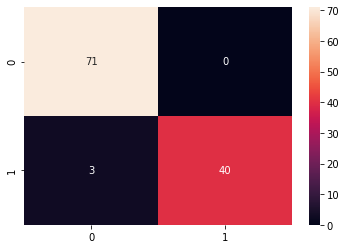

In [18]:
# View the confusion matrix

from sklearn.metrics import f1_score,confusion_matrix
results = confusion_matrix(y_test,predictions2)
sns.heatmap(results, annot=True,fmt="d")

## Conclusion

[[ go back to the top ]](#Table-of-contents)

Our decision tree has about 95.6 percent accuracy and sklearn's XGBoost has 97.3 percent accuracy. More data will help to increase both models' accuracies.